Bora la gatinhas


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random, math, pylab

In [ ]:
def get_cities_distance(cord1, cord2):
    return math.sqrt((cord1[0] - cord2[0])**2 + (cord1[1] - cord2[1])**2)


def table_distance(cities_cord, N):
    d = np.zeros((N,N))
    for i in range(0, N):
        for j in range(0, N):
            d[i][j] = get_cities_distance(cities_cord[i], cities_cord[j])

    return d


def get_energy(d, cam):
    ener = 0
    for i in range(N-1):
        ener += d[cam[i],cam[i+1]]
    
    ener += d[cam[0],cam[N-1]]
    
    return ener


def get_new_path(N, cam, dist):
    ncam = np.zeros(N,dtype=np.int16)
    i = np.random.randint(N)
    j = i

    while j==i:
        j=np.random.randint(N)

    if i>j:
        ini = j
        fim = i
    else:
        ini = i
        fim = j

    for k in range(N):
        if k >= ini and k <= fim:
            ncam[k] = cam[fim-k+ini]
        else:
            ncam[k] = cam[k]

    esq = ini - 1
    if esq < 0 : esq = N-1
    dir = fim+1
    if dir > N - 1: dir = 0
    de = -dist[cam[esq], cam[ini]] - dist[cam[dir], cam[fim]] + dist[ncam[esq], ncam[ini]] + dist[ncam[dir], ncam[fim]]

    return ncam, de

In [ ]:
def run(N):
    Ti = random.uniform(1, 10)
    Tf = random.uniform(0.005, 0.0001)
    dt = random.uniform(0.8, 0.99)

    x = np.random.rand(N)
    y = np.random.rand(N)

    cities_cord = []
    for i in range(0, N):
        cities_cord.append((x[i], y[i]))

    dist = table_distance(cities_cord, N)

    cam = np.linspace(0,N-1,N).astype(np.int)
    cam_plot = np.linspace(0,N-1,N).astype(np.int)


    print("Configuração inicial")
    print("N = ", N)
    print("Ti = ", Ti)
    print("Tf = ", Tf)
    print("dt = ", dt)
    print("Cordenadas das cidades = ", cities_cord)
    print("Caminho inicial: ", cam)

    custo_total = []
    x_plot = []
    f = 0

    custo = get_energy(dist, cam)
    print("Custo inicial: ", custo)
    j=0
    first_one = True

    while Ti>Tf:
        for i in range(0, 100):
            custo = get_energy(dist, cam)

            if first_one and i==99:
                cam_anterior = cam

            custo_total.append(custo)
            x_plot.append(f)
            f += 1

            ncam, de = get_new_path(N, cam, dist)
            if de<0:
                cam = ncam
            else:
                rand_number = random.uniform(0, 1)
                exp_number = math.exp(-de/Ti)
                if rand_number < exp_number:
                    cam = ncam

        first_one = False

        Ti *= dt


    print("Custo final: ",custo)
    print("Caminho final: ", cam)
    return custo_total, x_plot, cam_anterior, cam

In [ ]:
def show_energy_plot(total_cost, x_plot, title):
    plt.plot(x_plot, total_cost, label = 'energia', color='blue')
    plt.title(title)
    plt.xlabel('Iterações no algoritmo')
    plt.ylabel('Energia (distancia)')
    plt.legend()
    plt.show()

In [ ]:
def show_path(custom_path, title, N):
    newx = np.zeros(N+1, dtype=np.float32)
    newy = np.zeros(N+1, dtype=np.float32)

    for k in range(N-1):
      print(k)
      newx[k]=x[custom_path[k]]
      newy[k]=y[custom_path[k]]

    plt.plot(newx, newy, '-o')
    plt.title(title)
    plt.ion()

Configuração inicial
N =  10
Ti =  5.688741965907639
Tf =  0.003150871674890942
dt =  0.8198979679933204
Cordenadas das cidades =  [(0.7634216858326994, 0.041508222762251634), (0.17601625012839905, 0.13367595315374947), (0.8657383261577856, 0.633889226262051), (0.5684954592553849, 0.08783436715667836), (0.5886635256724392, 0.12059730551552517), (0.09863337186622012, 0.004982829680405199), (0.9829079496528433, 0.5305986840233167), (0.27009102262973705, 0.24054137225175487), (0.8615759490410894, 0.1415429295376831), (0.4131119022902041, 0.168879211169372)]
Caminho inicial:  [0 1 2 3 4 5 6 7 8 9]
Custo inicial:  5.830302334352814
Custo final:  2.470395254294541
Caminho final:  [3 4 0 8 6 2 7 1 5 9]


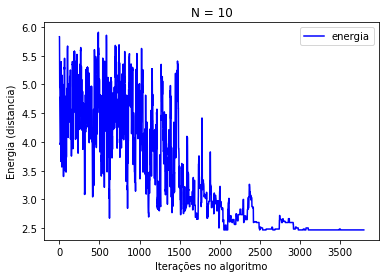

In [ ]:
N = random.randint(10, 60)
N = 10

total_cost, x_plot, first_path, path = run(N)
show_energy_plot(total_cost, x_plot, "N = 10")

0
1
2
3
4
5
6
7
8


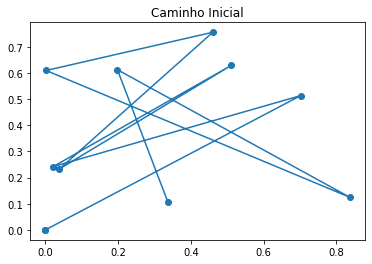

In [ ]:
show_path(first_path, "Caminho Inicial", N)

0
1
2
3
4
5
6
7
8


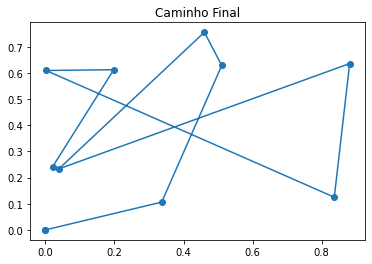

In [ ]:
show_path(path, "Caminho Final", N)